In [3]:
### Agricultural Cooperatives in Turkey ###

In [87]:
## Intro ##

# This analysis examines the impact agricultural cooperatives have on the Turkish economy.
# Data on number of new agricultural cooperatives (new_agr_coop_num) and the value they created (new_agr_coop_value), is available from 1985 to 2008. 
# Utilizing this information, I tried to see the relationship between value created by new agricultural cooperatives and value created in the agriculture sector as a whole. 
# 



In [154]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pymc3 as pm

In [199]:
# 
agr_coop = pd.read_csv(r'/Users/denizhallik/Desktop/master/python/tarım/tarim_koop_productivity_final.csv', sep=';', delimiter=None)
df = pd.DataFrame(agr_coop)
pd.DataFrame(df)

,year,new_agr_coop_value,new_agr_coop_num,new_agr_coop_value_to_num,agr_productivity,total_agr_value,log_total_agr_value,log_new_agr_coop_value,log_new_agr_coop_num,gdp,log_gdp,log_gdp_per_capita,agr_in_gdp
0,1985,5882,158,37,82723,31542150155,10.498891,3.769525,2.198657,67234948265,10.83,"3,8999",19.70
1,1986,6714,165,41,85749,32998975931,10.518500,3.826981,2.217484,75728009963,10.88,"3,9201",19.51
2,1987,10323,206,50,84073,33147385901,10.520449,4.013806,2.313867,87172789528,10.94,"3,9507",17.82
3,1988,17455,173,101,91032,35741962398,10.553178,4.241920,2.238046,90852814005,10.96,"3,9521",17.26
4,1989,19988,198,101,82820,33042693296,10.519075,4.300769,2.296665,107143348667,11.03,"3,9449",16.59
5,1990,87698,1007,87,88955,35294730040,10.547710,4.942990,3.003029,150676291094,11.18,"3,9751",17.48
6,1991,51278,387,133,87294,34976184301,10.543772,4.709931,2.587711,150027833333,11.18,"3,9703",15.25
7,1992,72060,399,181,91408,36475486625,10.562001,4.857694,2.600973,158459130435,11.20,"3,9840",14.98
8,1993,1217074,672,1811,90214,36007201319,10.556389,6.085317,2.827369,180169736364,11.26,"4,0085",15.42
9,1994,952454,671,1419,89034,35746436772,10.553233,5.978844,2.826723,130690172297,11.12,"3,9801",15.47


In [157]:
fig = px.line(df, y="agr_in_gdp", x="gdp_per_capita", text="year", title='Agriculture in GDP')
fig.update_traces(textposition="bottom right")
fig.show()

In [182]:
fig = px.line(df, x="year", y="gdp_per_capita", title='GDP Per Capita')
fig.show()

In [263]:
fig = px.line(df, x="year", y="gdp", title='GDP')
fig.show()

In [264]:
fig = px.line(df, x="year", y="log_gdp", title='Log GDP')
fig.show()

In [269]:
fig = px.line(df, x="year", y="log_new_agr_coop_value", title='Log New Agriculture Cooperative Value Added')
fig.show()

In [268]:
fig = px.line(df, x="year", y="new_agr_coop_value", title='New Agriculture Cooperative Value Added')
fig.show()

In [267]:
fig = px.line(df, x="year", y="new_agr_coop_value_to_num", title='New Agriculture Cooperative Value Added Divided by Number')
fig.show()

In [160]:
fig = px.line(df, x="year", y="log_total_agr_value", title='Log Total Agricultural Value Added')
fig.show()

In [262]:
fig = px.line(df, x="year", y="total_agr_value", title='Total Agricultural Value Added')
fig.show()

In [221]:
formula = "log_new_agr_coop_value ~ log_total_agr_value"

with pm.Model() as model_1:
        pm.GLM.from_formula(formula, data=agr_coop)
        trace_1 = pm.sample(draws=1000, tune=1500, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, log_total_agr_value, Intercept]


/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_500 tune and 1_000 draw iterations (3_000 + 2_000 draws total) took 70 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/1997299354.py:1: DeprecationWarning:

The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'log_total_agr_value'}>,
        <AxesSubplot:title={'center':'log_total_agr_value'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

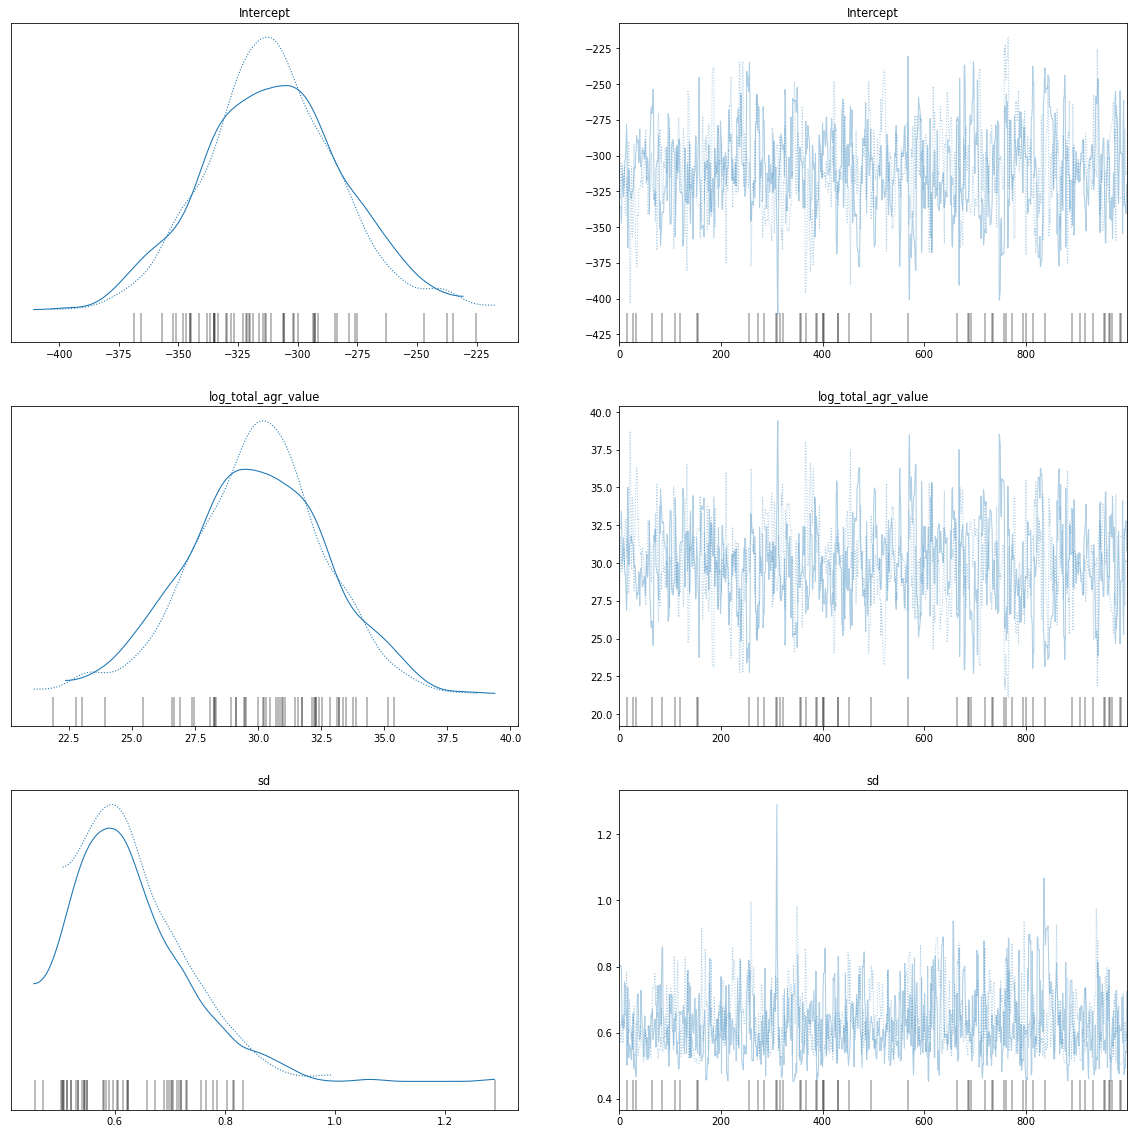

In [225]:
pm.traceplot(trace_1 ,figsize=(20,20))

/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/3580526673.py:1: DeprecationWarning:

The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

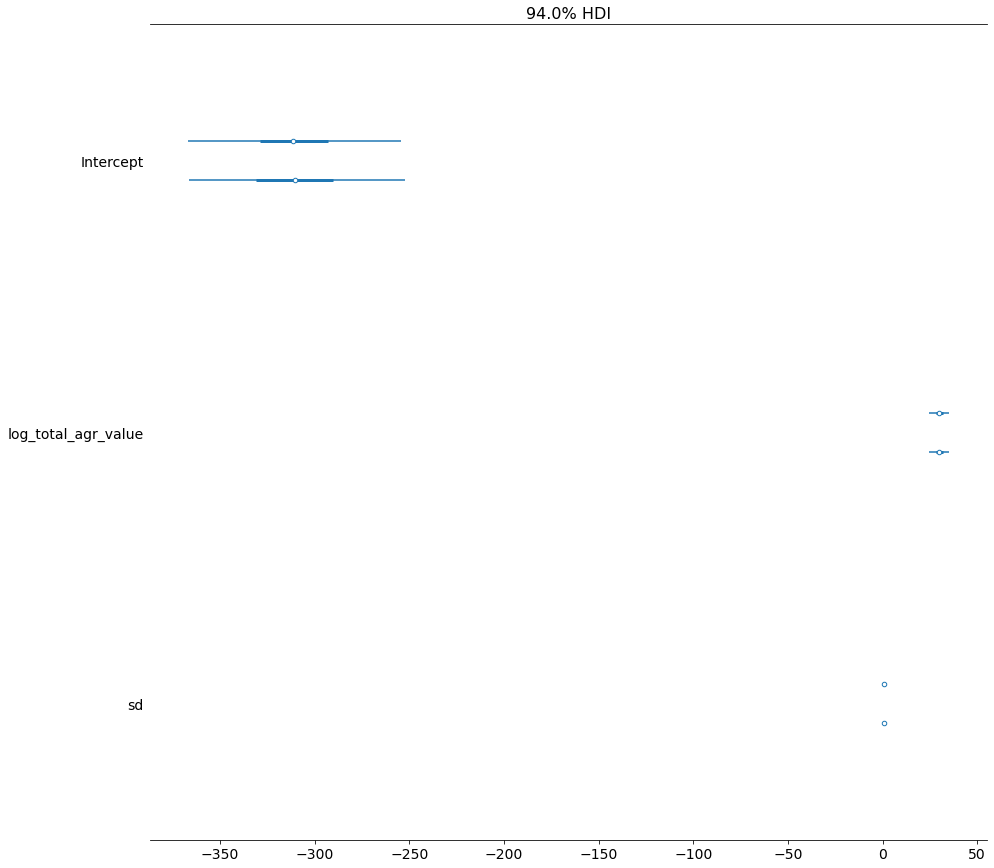

In [226]:
pm.forestplot(trace_1, figsize=(15,15))

In [227]:
pm.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-310.707,29.701,-366.729,-253.025,1.435,1.015,430.0,493.0,1.01
log_total_agr_value,29.952,2.808,24.686,35.434,0.136,0.096,430.0,493.0,1.01
sd,0.632,0.098,0.484,0.835,0.005,0.003,388.0,142.0,1.01


In [228]:
formula = "log_new_agr_coop_value ~ log_new_agr_coop_num"

with pm.Model() as model_2:
        pm.GLM.from_formula(formula, data=agr_coop)
        trace_2 = pm.sample(draws=1000, tune=1000, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, log_new_agr_coop_num, Intercept]


/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/855787665.py:1: DeprecationWarning:

The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'log_new_agr_coop_num'}>,
        <AxesSubplot:title={'center':'log_new_agr_coop_num'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

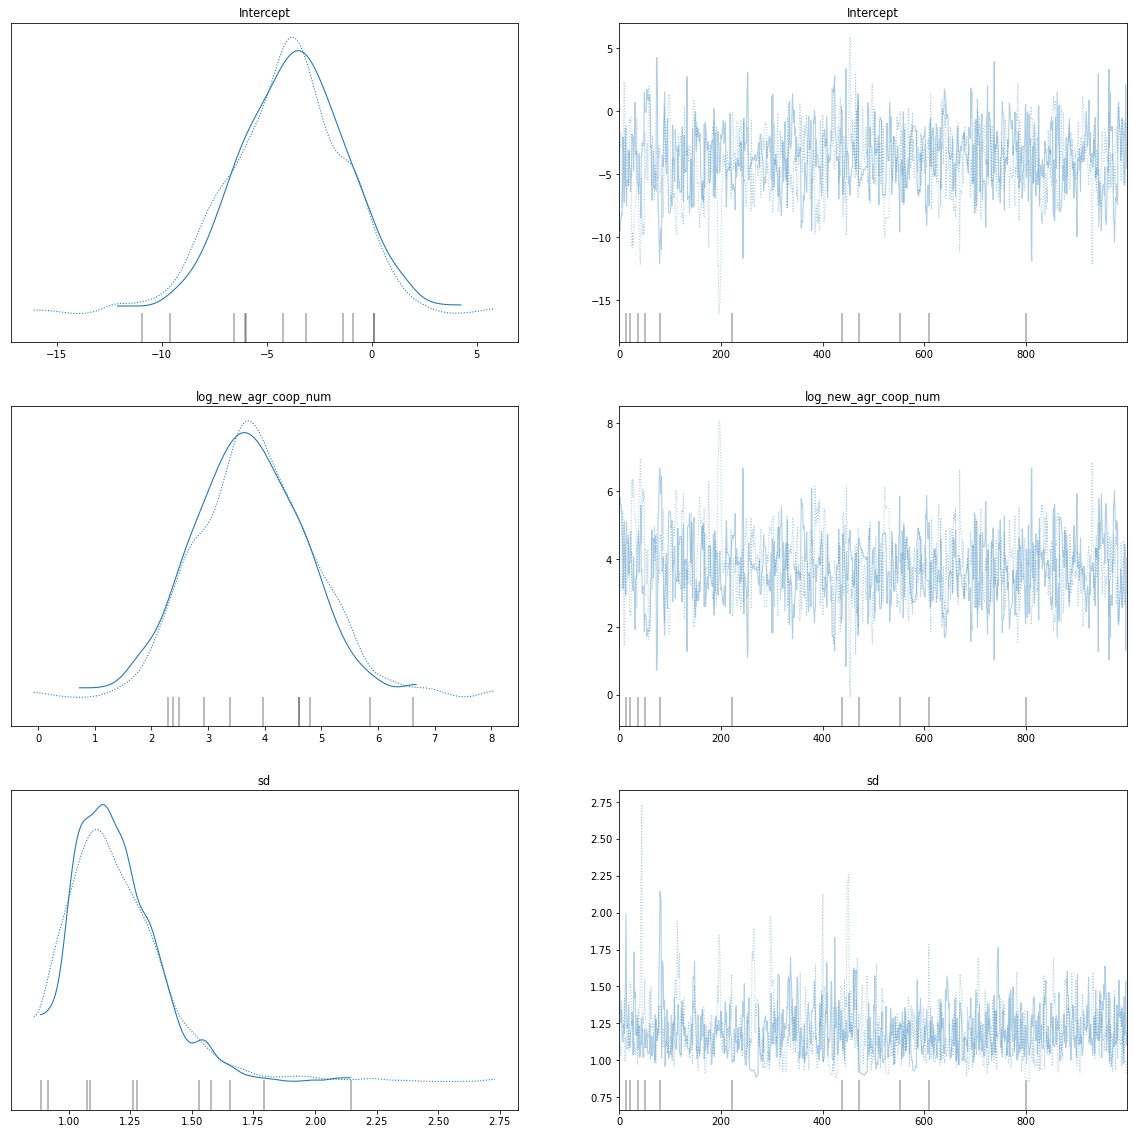

In [229]:
pm.traceplot(trace_2 ,figsize=(20,20))

/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/1991064655.py:1: DeprecationWarning:

The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

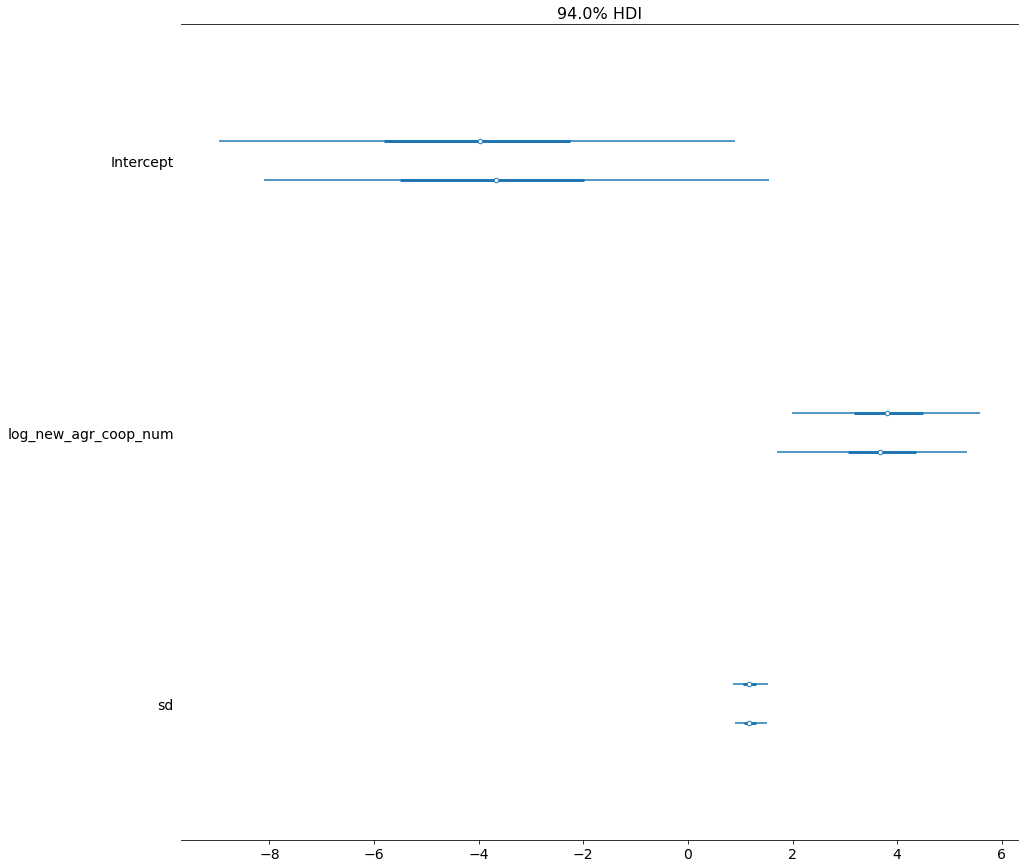

In [230]:
pm.forestplot(trace_2, figsize=(15,15))

In [231]:
pm.summary(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-3.905,2.701,-8.864,0.967,0.122,0.093,499.0,461.0,1.0
log_new_agr_coop_num,3.775,1.014,1.884,5.578,0.046,0.034,496.0,467.0,1.0
sd,1.196,0.193,0.881,1.518,0.009,0.006,409.0,235.0,1.0


In [232]:
formula = "log_new_agr_coop_value ~ log_gdp"

with pm.Model() as model_3:
        pm.GLM.from_formula(formula, data=agr_coop)
        trace_3 = pm.sample(draws=1000, tune=1000, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, log_gdp, Intercept]


/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.8855642241359878, but should be close to 0.8. Try to increase the number of tuning steps.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/3943514526.py:1: DeprecationWarning:

The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'log_gdp'}>,
        <AxesSubplot:title={'center':'log_gdp'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

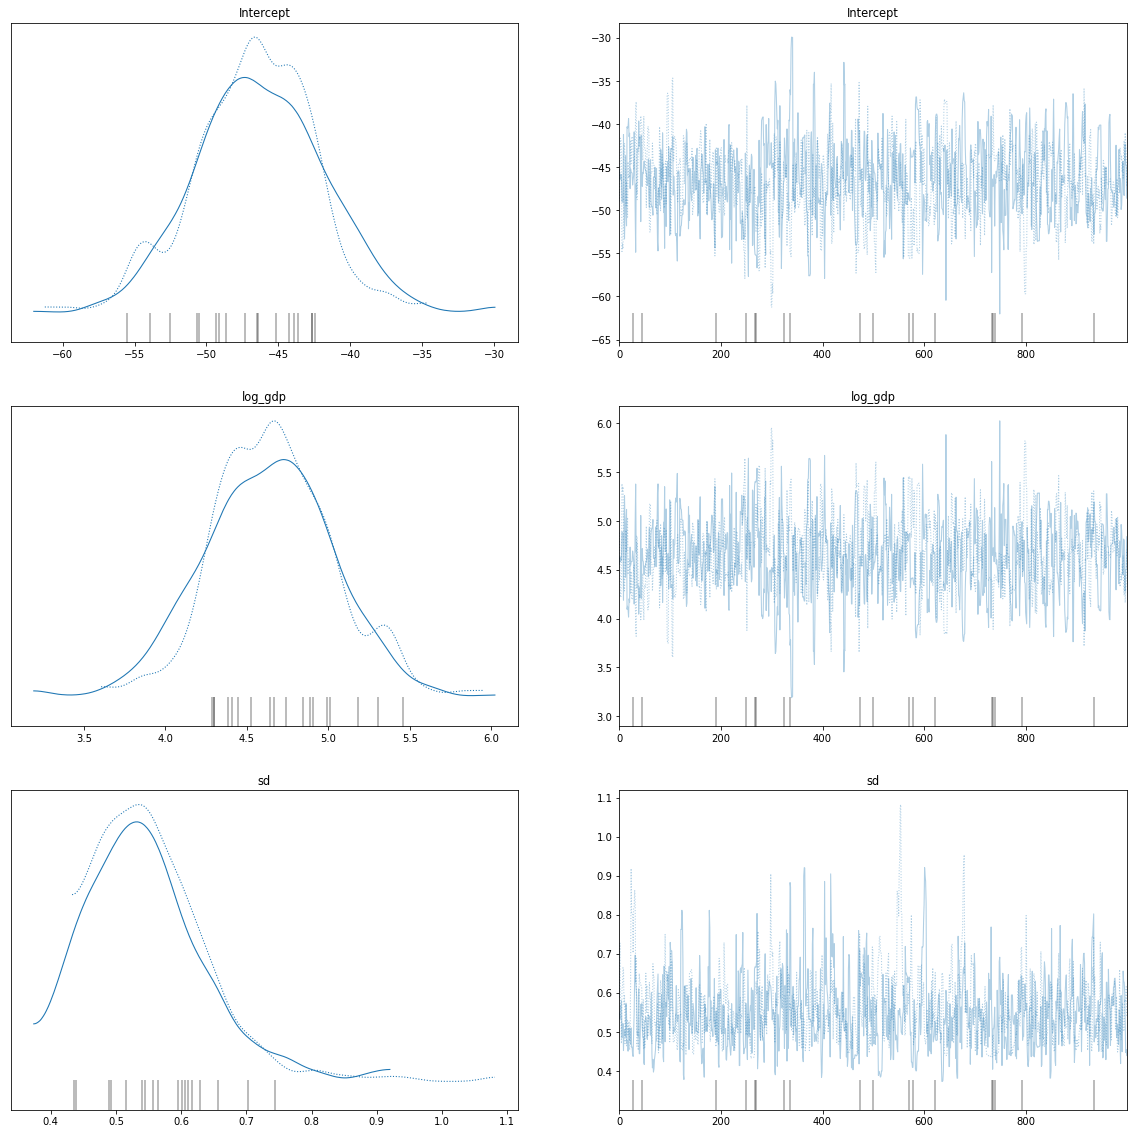

In [233]:
pm.traceplot(trace_3 ,figsize=(20,20))

/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/3994924372.py:1: DeprecationWarning:

The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

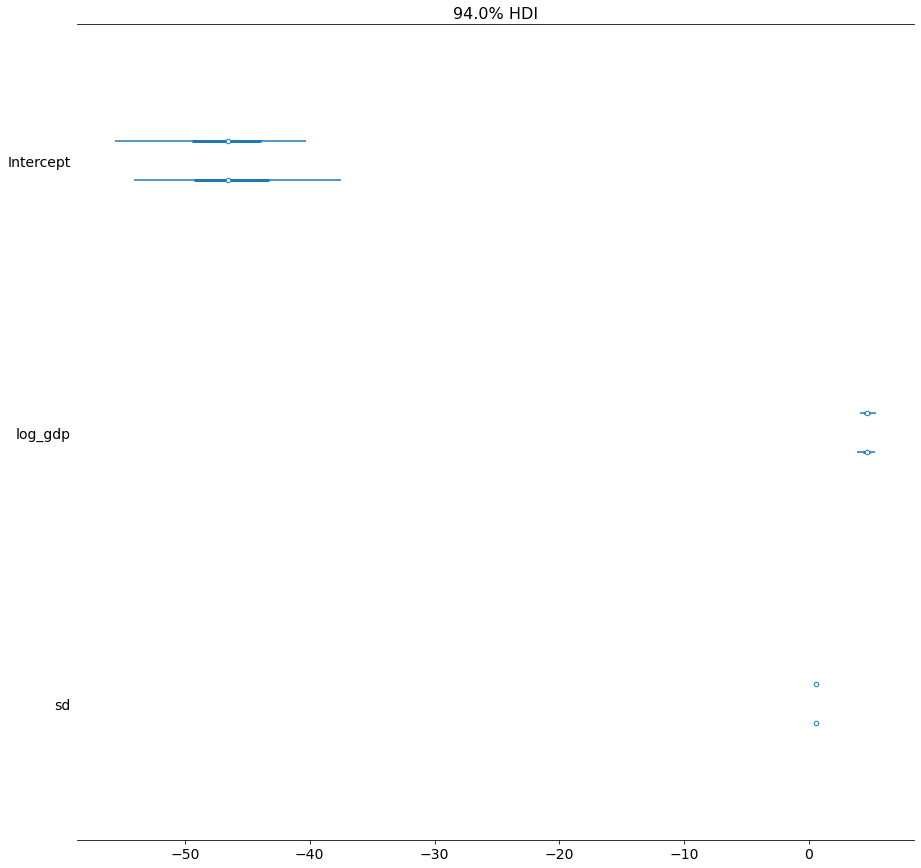

In [234]:
pm.forestplot(trace_3, figsize=(15,15))

In [235]:
pm.summary(trace_3)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-46.527,4.342,-55.205,-38.995,0.197,0.139,496.0,586.0,1.00
log_gdp,4.652,0.384,3.981,5.411,0.017,0.012,495.0,625.0,1.00
sd,0.552,0.090,0.408,0.721,0.004,0.003,408.0,461.0,1.01


In [236]:
formula = "log_new_agr_coop_value ~ log_total_agr_value"

with pm.Model() as model_4:
    
    pm.GLM.from_formula(formula, data=agr_coop)
    trace_4 = pm.sample(draws=1000, tune=1500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_4)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, log_total_agr_value, Intercept]


Sampling 2 chains for 1_500 tune and 1_000 draw iterations (3_000 + 2_000 draws total) took 47 seconds.
There were 102 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.649257223623807, but should be close to 0.8. Try to increase the number of tuning steps.
There were 235 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3055154582376742, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [237]:
print(posterior_predictive['y'])

[[3.44549271 4.72065072 4.41358151 ... 7.95665436 6.98041308 7.84481292]
 [3.11314527 6.29070525 4.42185981 ... 8.38215365 6.43894641 7.56976245]
 [3.99694263 5.93458813 5.25036479 ... 7.24753529 8.18449905 6.75002071]
 ...
 [3.14558217 3.93476074 4.50492216 ... 7.53510065 7.21744197 8.10848595]
 [3.72547035 4.14549952 3.84964359 ... 7.6842732  6.82082216 8.03201344]
 [4.06488905 3.67884634 4.05268813 ... 8.4623164  8.18703939 8.07439445]]


<AxesSubplot:title={'center':'x'}>

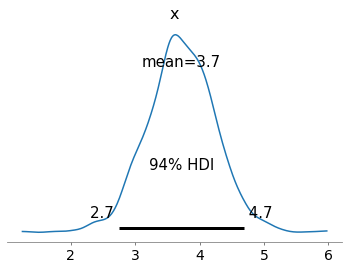

In [238]:
pm.plot_posterior(posterior_predictive['y'][:,0])

<AxesSubplot:title={'center':'x'}>

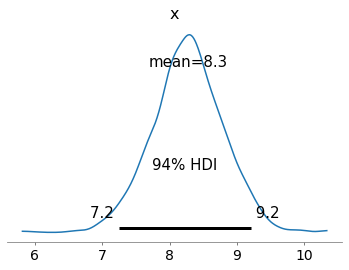

In [242]:
pm.plot_posterior(posterior_predictive['y'][:,23])

In [243]:
len(posterior_predictive['y'][:,23])

2000

In [244]:
errors=[]
for index, observation in agr_coop.iterrows():
    error=posterior_predictive['y'][:,index] - observation['log_new_agr_coop_value']
    errors.append(error)
    
error_distribution=np.array(errors).reshape(-1)
error_distribution.shape

(48000,)

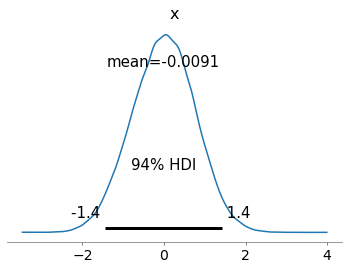

In [245]:
pm.plot_posterior(error_distribution)
plt.show()

In [248]:
Y = agr_coop['log_new_agr_coop_value']
X1 = agr_coop['log_total_agr_value']
X2 = agr_coop['log_new_agr_coop_num']
X3 = agr_coop['log_gdp']

with pm.Model() as model_5:
    beta0 = pm.Normal("beta0", 0.0, 1.0) 
    beta1 = pm.Normal("beta1", 0.0, 1.0)
    beta2 = pm.Normal("beta2", 0.0, 1.0)
    beta3 = pm.Normal("beta3", 0.0, 1.0)

    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_5 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_5)

/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta3, beta2, beta1, beta0]


/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.


/var/folders/hq/mdb71v5d6rg8zrnw1xl9nq4w0000gn/T/ipykernel_3126/687915877.py:1: DeprecationWarning:

The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'beta0'}>,
        <AxesSubplot:title={'center':'beta0'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>]], dtype=object)

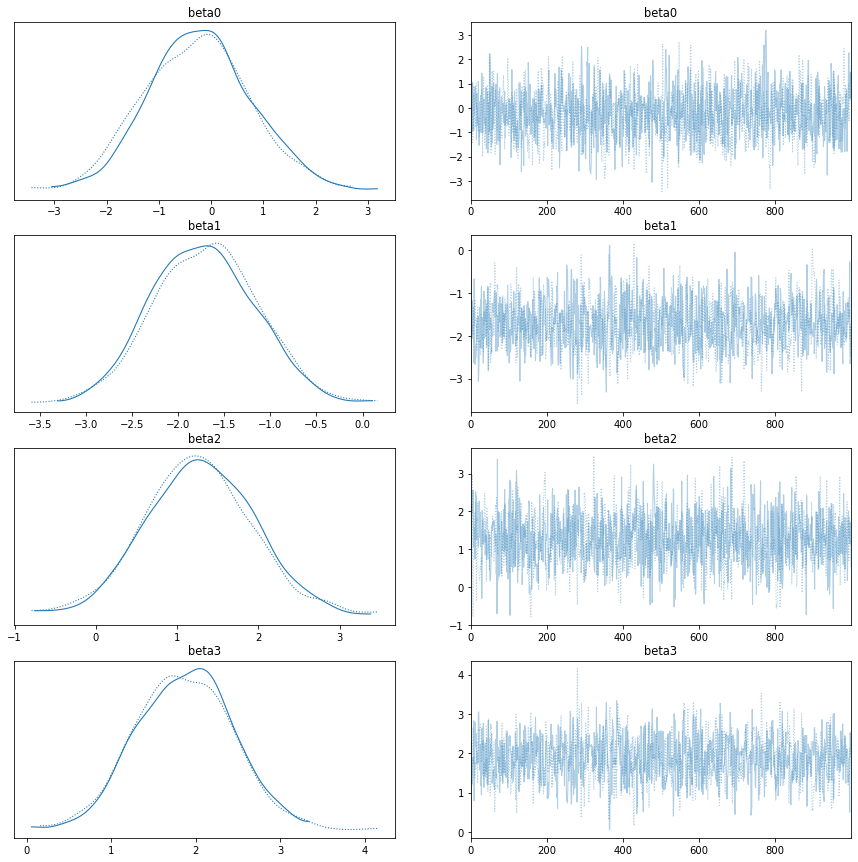

In [249]:
pm.traceplot(trace_5 ,figsize=(15,15))

In [250]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

In [251]:
beta0_true = np.mean(trace_5.get_values('beta0'))
beta1_true = np.mean(trace_5.get_values('beta1'))
beta2_true = np.mean(trace_5.get_values('beta2'))
beta3_true = np.mean(trace_5.get_values('beta3'))

print(beta0_true,beta1_true,beta2_true,beta3_true)

-0.23954648278773635 -1.7144842881765634 1.2692605308712273 1.8673642257501684


In [252]:
len(trace_5.get_values('beta0'))

2000

In [253]:
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

trace = trace_5
traces =  [trace]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace["beta0"])
    beta1 = from_posterior("beta1", trace["beta1"])
    beta2 = from_posterior("beta2", trace["beta2"])
    beta3 = from_posterior("beta3", trace["beta3"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 1000 posterior samples
    trace = sample(1000)
    # it is just another way of sampling data, iterates 1000 draws and 1000 tunes
    traces.append(trace)

/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta3, beta2, beta1, beta0]


/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 299 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3041202736556193, but should be close to 0.8. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5977697337149702, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some paramet

Posterior distributions after 2 iterations.


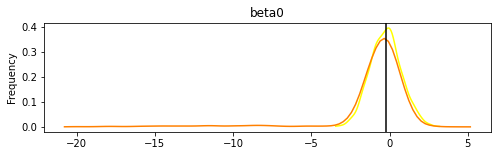

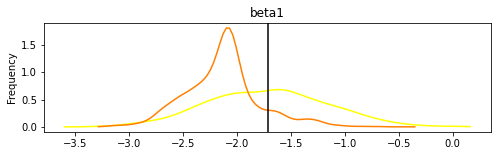

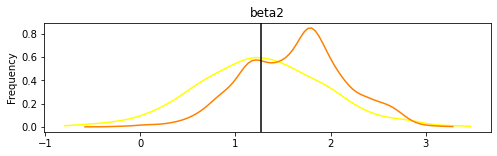

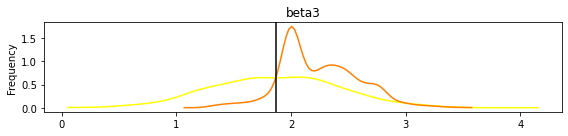

In [254]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1", "beta2", "beta3"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true, "beta2": beta2_true, "beta3": beta3_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout();

In [256]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/denizhallik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-0.977,2.728,-3.049,2.360,0.336,0.239,72.0,79.0,1.05
beta1,-2.132,0.351,-2.752,-1.342,0.031,0.023,96.0,91.0,1.22
beta2,1.618,0.540,0.670,2.652,0.157,0.122,12.0,28.0,1.25
beta3,2.241,0.344,1.720,2.992,0.066,0.047,30.0,104.0,1.10
